In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataPath = "/content/drive/MyDrive/advanced ml/autoencoders/"

In [ ]:
kddCupTrain = pd.read_csv(dataPath + 'kddCupTrain.csv',header=None)
kddCupTrain.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
print("Shape of kddCupTrain: ",kddCupTrain.shape)
print("There are any missing values: ", kddCupTrain.isnull().values.any())

Shape of kddCupTrain:  (985262, 42)
There are any missing values:  False


In [ ]:
kddCupTest = pd.read_csv(dataPath + 'kddCupTest.csv',header=None)
kddCupTest.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
0,0,tcp,http,SF,230,10066,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,19,20,0.0,0.0,0.0,0.0,1.0,0.0,0.1,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0
1,0,udp,private,SF,105,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,227,0.89,0.01,0.00,0.00,0.00,0.0,0.0,0.0
2,1,tcp,smtp,SF,1888,374,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,174,0.68,0.03,0.00,0.00,0.00,0.0,0.0,0.0
3,0,tcp,http,SF,330,1477,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,9,9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,94,255,1.00,0.00,0.01,0.03,0.01,0.0,0.0,0.0
4,2625,udp,other,SF,146,105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2,0.0,0.0,0.0,0.0,0.5,0.5,0.0,255,2,0.01,0.87,1.00,0.00,0.00,0.0,0.0,0.0


In [ ]:
print("Shape of kddCupTrain: ",kddCupTest.shape)
print("There are any missing values: ", kddCupTest.isnull().values.any())

Shape of kddCupTrain:  (196557, 41)
There are any missing values:  False


In [ ]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [ ]:
kddCupTrain.iloc[:,-1].unique()

array(['normal.', 'ipsweep.'], dtype=object)

In [ ]:
kddCupTrain.rename(columns={41:'Class'}, inplace=True)

In [ ]:
kddCupTrain['Class'] = np.where(kddCupTrain['Class'] == 'normal.', 0, 1)

In [ ]:
count_classes = pd.value_counts(kddCupTrain['Class'], sort = True)
print(count_classes)

0    972781
1     12481
Name: Class, dtype: int64


2. Remove the uninformative columns
Look at summaries of numeric features.

In [ ]:
print(kddCupTrain.describe(percentiles=[]))

                   0             4             5              6         7  \
count  985262.000000  9.852620e+05  9.852620e+05  985262.000000  985262.0   
mean      215.078631  1.459258e+03  3.193730e+03       0.000007       0.0   
std      1343.633640  1.097984e+05  3.401613e+04       0.002665       0.0   
min         0.000000  0.000000e+00  0.000000e+00       0.000000       0.0   
50%         0.000000  2.300000e+02  4.060000e+02       0.000000       0.0   
max     58329.000000  8.958152e+07  1.173059e+07       1.000000       0.0   

                   8              9             10             11  \
count  985262.000000  985262.000000  985262.000000  985262.000000   
mean        0.000036       0.048908       0.000097       0.710185   
std         0.015897       0.926008       0.013058       0.453677   
min         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       1.000000   
max        14.000000      77.000000       4.00

In [ ]:
Trainback = kddCupTrain.iloc[:,:41]
Testback = kddCupTest

In [ ]:
merged = Trainback.append(Testback)

1.3. Transform symbolic features to "One Hot" columns
Transform character features "1", "2" and "3" into "One Hot" columns using pandas.get_dummies() as shown in the section above.

As a result, the first two rows of kddCupTrain should look like this:

In [ ]:
merged = pd.get_dummies(merged, columns = [1, 2, 3])
merged

,0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1_icmp,1_tcp,1_udp,2_IRC,2_X11,2_Z39_50,2_auth,2_bgp,2_csnet_ns,2_ctf,2_daytime,2_discard,...,2_hostnames,2_http,2_http_2784,2_imap4,2_iso_tsap,2_link,2_mtp,2_name,2_netbios_dgm,2_netbios_ns,2_netbios_ssn,2_netstat,2_nntp,2_ntp_u,2_other,2_pm_dump,2_pop_2,2_pop_3,2_printer,2_private,2_red_i,2_remote_job,2_rje,2_shell,2_smtp,2_sql_net,2_ssh,2_sunrpc,2_supdup,2_systat,2_telnet,2_tftp_u,2_tim_i,2_time,2_urh_i,2_urp_i,2_uucp,2_uucp_path,2_vmnet,2_whois,3_OTH,3_REJ,3_RSTO,3_RSTR,3_S0,3_S1,3_S2,3_S3,3_SF,3_SH
0,0,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0,0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0,1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.00,1,1,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.00,0,1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.00,2,2,1.00,0.00,0.50,0.00,0.0,0.0,0.0,0.00,0,1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.00,3,3,1.00,0.00,0.33,0.00,0.0,0.0,0.0,0.00,0,1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.00,4,4,1.00,0.00,0.25,0.00,0.0,0.0,0.0,0.00,0,1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196552,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,1.0,1.0,1.0,0.0,0.00,5,255,1.00,0.00,0.20,0.25,0.0,0.0,1.0,1.00,0,1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
196553,0,146,5532,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,24,0.0,0.0,0.0,0.0,1.0,0.0,0.12,1,255,1.00,0.00,1.00,0.02,0.0,0.0,0.0,0.01,0,1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
196554,0,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.00,255,245,0.96,0.01,0.00,0.00,0.0,0.0,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
196555,0,267,14496,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,7,7,0.0,0.0,0.0,0.0,1.0,0.0,0.00,56,255,1.00,0.00,0.02,0.03,0.0,0.0,0.0,0.00,0,1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


1.4. Standardize the training dataset
Create a list of features, standardize the features columns using sklearn.preprocessing.StandardScaler.

In [ ]:
featuresList = [col for col in merged]

In [ ]:
scaler = preprocessing.StandardScaler()
scaler.fit(merged[featuresList]);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
merged[featuresList] = scaler.transform(merged[featuresList])
merged

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


,0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1_icmp,1_tcp,1_udp,2_IRC,2_X11,2_Z39_50,2_auth,2_bgp,2_csnet_ns,2_ctf,2_daytime,2_discard,...,2_hostnames,2_http,2_http_2784,2_imap4,2_iso_tsap,2_link,2_mtp,2_name,2_netbios_dgm,2_netbios_ns,2_netbios_ssn,2_netstat,2_nntp,2_ntp_u,2_other,2_pm_dump,2_pop_2,2_pop_3,2_printer,2_private,2_red_i,2_remote_job,2_rje,2_shell,2_smtp,2_sql_net,2_ssh,2_sunrpc,2_supdup,2_systat,2_telnet,2_tftp_u,2_tim_i,2_time,2_urh_i,2_urp_i,2_uucp,2_uucp_path,2_vmnet,2_whois,3_OTH,3_REJ,3_RSTO,3_RSTR,3_S0,3_S1,3_S2,3_S3,3_SF,3_SH
0,-0.160362,-0.011862,1.242329,-0.002434,0.0,-0.002282,-0.052656,-0.007406,0.638396,-0.004347,-0.017359,-0.009829,-0.007467,-0.021268,-0.018767,-0.064204,0.0,-0.001301,-0.061838,-0.304995,-0.458239,-0.058344,-0.064851,-0.248537,-0.250684,0.161051,-0.161813,-0.485074,-1.415172,-2.295692,-2.752777,-0.314926,-0.488343,-0.371382,-0.074809,-0.061628,-0.260522,-0.259200,-0.152819,0.526372,-0.490819,-0.022947,-0.011304,-0.00092,-0.048654,-0.00092,-0.00092,-0.003442,-0.00092,-0.00092,...,-0.00092,0.768408,-0.00092,-0.00184,-0.00092,-0.003442,-0.003442,-0.003442,-0.00092,-0.00092,-0.00092,-0.00092,-0.001593,-0.062646,-0.24957,-0.001301,-0.00092,-0.030827,-0.00092,-0.28626,-0.002909,-0.003442,-0.003442,-0.00276,-0.327502,-0.00092,-0.004215,-0.00092,-0.00092,-0.00092,-0.047657,-0.001593,-0.002909,-0.022984,-0.012239,-0.074407,-0.001301,-0.00092,-0.00092,-0.003442,-0.003679,-0.245158,-0.025417,-0.018308,-0.023223,-0.023404,-0.012513,-0.006884,0.250356,-0.001301
1,-0.160362,-0.012381,0.039494,-0.002434,0.0,-0.002282,-0.052656,-0.007406,0.638396,-0.004347,-0.017359,-0.009829,-0.007467,-0.021268,-0.018767,-0.064204,0.0,-0.001301,-0.061838,-0.265915,-0.412279,-0.058344,-0.064851,-0.248537,-0.250684,0.161051,-0.161813,-0.485074,-1.405551,-2.284281,0.507318,-0.314926,2.919778,-0.371382,-0.074809,-0.061628,-0.260522,-0.259200,-0.152819,0.526372,-0.490819,-0.022947,-0.011304,-0.00092,-0.048654,-0.00092,-0.00092,-0.003442,-0.00092,-0.00092,...,-0.00092,0.768408,-0.00092,-0.00184,-0.00092,-0.003442,-0.003442,-0.003442,-0.00092,-0.00092,-0.00092,-0.00092,-0.001593,-0.062646,-0.24957,-0.001301,-0.00092,-0.030827,-0.00092,-0.28626,-0.002909,-0.003442,-0.003442,-0.00276,-0.327502,-0.00092,-0.004215,-0.00092,-0.00092,-0.00092,-0.047657,-0.001593,-0.002909,-0.022984,-0.012239,-0.074407,-0.001301,-0.00092,-0.00092,-0.003442,-0.003679,-0.245158,-0.025417,-0.018308,-0.023223,-0.023404,-0.012513,-0.006884,0.250356,-0.001301
2,-0.160362,-0.011657,-0.058399,-0.002434,0.0,-0.002282,-0.052656,-0.007406,0.638396,-0.004347,-0.017359,-0.009829,-0.007467,-0.021268,-0.018767,-0.064204,0.0,-0.001301,-0.061838,-0.304995,-0.458239,-0.058344,-0.064851,-0.248537,-0.250684,0.161051,-0.161813,-0.485074,-1.395930,-2.272870,0.507318,-0.314926,1.215717,-0.371382,-0.074809,-0.061628,-0.260522,-0.259200,-0.152819,0.526372,-0.490819,-0.022947,-0.011304,-0.00092,-0.048654,-0.00092,-0.00092,-0.003442,-0.00092,-0.00092,...,-0.00092,0.768408,-0.00092,-0.00184,-0.00092,-0.003442,-0.003442,-0.003442,-0.00092,-0.00092,-0.00092,-0.00092,-0.001593,-0.062646,-0.24957,-0.001301,-0.00092,-0.030827,-0.00092,-0.28626,-0.002909,-0.003442,-0.003442,-0.00276,-0.327502,-0.00092,-0.004215,-0.00092,-0.00092,-0.00092,-0.047657,-0.001593,-0.002909,-0.022984,-0.012239,-0.074407,-0.001301,-0.00092,-0.00092,-0.003442,-0.003679,-0.245158,-0.025417,-0.018308,-0.023223,-0.023404,-0.012513,-0.006884,0.250356,-0.001301
3,-0.160362,-0.011686,-0.034548,-0.002434,0.0,-0.002282,-0.052656,-0.007406,0.638396,-0.004347,-0.017359,-0.009829,-0.007467,-0.021268,-0.018767,-0.064204,0.0,-0.001301,-0.061838,-0.265915,-0.412279,-0.058344,-0.064851,-0.248537,-0.250684,0.161051,-0.161813,-0.485074,-1.386309,-2.261460,0.507318,-0.314926,0.636337,-0.371382,-0.074809,-0.061628,-0.260522,-0.259200,-0.152819,0.526372,-0.490819,-0.022947,-0.011304,-0.00092,-0.048654,-0.00092,-0.00092,-0.003442,-0.00092,-0.00092,...,-0.00092,0

In [ ]:
print('Mean values:')
print(merged[featuresList].mean())
print('\nStd values:')
print(merged[featuresList].std(ddof=0))

Mean values:
0      -1.571555e-12
4       2.369089e-16
5      -2.665670e-14
6       1.369744e-14
7       0.000000e+00
            ...     
3_S1    1.701077e-14
3_S2   -2.705570e-14
3_S3    1.767688e-14
3_SF    3.668440e-13
3_SH    3.676655e-15
Length: 110, dtype: float64

Std values:
0       1.0
4       1.0
5       1.0
6       1.0
7       0.0
       ... 
3_S1    1.0
3_S2    1.0
3_S3    1.0
3_SF    1.0
3_SH    1.0
Length: 110, dtype: float64


In [ ]:
kddCupTrain.iloc[:,-1]

0         0
1         0
2         0
3         0
4         0
         ..
985257    0
985258    0
985259    0
985260    0
985261    0
Name: Class, Length: 985262, dtype: int64

In [ ]:
kddcuptrain = merged.iloc[:985262,:]

In [ ]:
kddcuptrain['class'] = kddCupTrain.iloc[:,-1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
kddcuptest = merged.iloc[985262:,:]

In [ ]:
kddcuptrain

,0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1_icmp,1_tcp,1_udp,2_IRC,2_X11,2_Z39_50,2_auth,2_bgp,2_csnet_ns,2_ctf,2_daytime,2_discard,...,2_http,2_http_2784,2_imap4,2_iso_tsap,2_link,2_mtp,2_name,2_netbios_dgm,2_netbios_ns,2_netbios_ssn,2_netstat,2_nntp,2_ntp_u,2_other,2_pm_dump,2_pop_2,2_pop_3,2_printer,2_private,2_red_i,2_remote_job,2_rje,2_shell,2_smtp,2_sql_net,2_ssh,2_sunrpc,2_supdup,2_systat,2_telnet,2_tftp_u,2_tim_i,2_time,2_urh_i,2_urp_i,2_uucp,2_uucp_path,2_vmnet,2_whois,3_OTH,3_REJ,3_RSTO,3_RSTR,3_S0,3_S1,3_S2,3_S3,3_SF,3_SH,class
0,-0.160362,-0.011862,1.242329,-0.002434,0.0,-0.002282,-0.052656,-0.007406,0.638396,-0.004347,-0.017359,-0.009829,-0.007467,-0.021268,-0.018767,-0.064204,0.0,-0.001301,-0.061838,-0.304995,-0.458239,-0.058344,-0.064851,-0.248537,-0.250684,0.161051,-0.161813,-0.485074,-1.415172,-2.295692,-2.752777,-0.314926,-0.488343,-0.371382,-0.074809,-0.061628,-0.260522,-0.2592,-0.152819,0.526372,-0.490819,-0.022947,-0.011304,-0.00092,-0.048654,-0.00092,-0.00092,-0.003442,-0.00092,-0.00092,...,0.768408,-0.00092,-0.00184,-0.00092,-0.003442,-0.003442,-0.003442,-0.00092,-0.00092,-0.00092,-0.00092,-0.001593,-0.062646,-0.24957,-0.001301,-0.00092,-0.030827,-0.00092,-0.28626,-0.002909,-0.003442,-0.003442,-0.00276,-0.327502,-0.00092,-0.004215,-0.00092,-0.00092,-0.00092,-0.047657,-0.001593,-0.002909,-0.022984,-0.012239,-0.074407,-0.001301,-0.00092,-0.00092,-0.003442,-0.003679,-0.245158,-0.025417,-0.018308,-0.023223,-0.023404,-0.012513,-0.006884,0.250356,-0.001301,0
1,-0.160362,-0.012381,0.039494,-0.002434,0.0,-0.002282,-0.052656,-0.007406,0.638396,-0.004347,-0.017359,-0.009829,-0.007467,-0.021268,-0.018767,-0.064204,0.0,-0.001301,-0.061838,-0.265915,-0.412279,-0.058344,-0.064851,-0.248537,-0.250684,0.161051,-0.161813,-0.485074,-1.405551,-2.284281,0.507318,-0.314926,2.919778,-0.371382,-0.074809,-0.061628,-0.260522,-0.2592,-0.152819,0.526372,-0.490819,-0.022947,-0.011304,-0.00092,-0.048654,-0.00092,-0.00092,-0.003442,-0.00092,-0.00092,...,0.768408,-0.00092,-0.00184,-0.00092,-0.003442,-0.003442,-0.003442,-0.00092,-0.00092,-0.00092,-0.00092,-0.001593,-0.062646,-0.24957,-0.001301,-0.00092,-0.030827,-0.00092,-0.28626,-0.002909,-0.003442,-0.003442,-0.00276,-0.327502,-0.00092,-0.004215,-0.00092,-0.00092,-0.00092,-0.047657,-0.001593,-0.002909,-0.022984,-0.012239,-0.074407,-0.001301,-0.00092,-0.00092,-0.003442,-0.003679,-0.245158,-0.025417,-0.018308,-0.023223,-0.023404,-0.012513,-0.006884,0.250356,-0.001301,0
2,-0.160362,-0.011657,-0.058399,-0.002434,0.0,-0.002282,-0.052656,-0.007406,0.638396,-0.004347,-0.017359,-0.009829,-0.007467,-0.021268,-0.018767,-0.064204,0.0,-0.001301,-0.061838,-0.304995,-0.458239,-0.058344,-0.064851,-0.248537,-0.250684,0.161051,-0.161813,-0.485074,-1.395930,-2.272870,0.507318,-0.314926,1.215717,-0.371382,-0.074809,-0.061628,-0.260522,-0.2592,-0.152819,0.526372,-0.490819,-0.022947,-0.011304,-0.00092,-0.048654,-0.00092,-0.00092,-0.003442,-0.00092,-0.00092,...,0.768408,-0.00092,-0.00184,-0.00092,-0.003442,-0.003442,-0.003442,-0.00092,-0.00092,-0.00092,-0.00092,-0.001593,-0.062646,-0.24957,-0.001301,-0.00092,-0.030827,-0.00092,-0.28626,-0.002909,-0.003442,-0.003442,-0.00276,-0.327502,-0.00092,-0.004215,-0.00092,-0.00092,-0.00092,-0.047657,-0.001593,-0.002909,-0.022984,-0.012239,-0.074407,-0.001301,-0.00092,-0.00092,-0.003442,-0.003679,-0.245158,-0.025417,-0.018308,-0.023223,-0.023404,-0.012513,-0.006884,0.250356,-0.001301,0
3,-0.160362,-0.011686,-0.034548,-0.002434,0.0,-0.002282,-0.052656,-0.007406,0.638396,-0.004347,-0.017359,-0.009829,-0.007467,-0.021268,-0.018767,-0.064204,0.0,-0.001301,-0.061838,-0.265915,-0.412279,-0.058344,-0.064851,-0.248537,-0.250684,0.161051,-0.161813,-0.485074,-1.386309,-2.261460,0.507318,-0.314926,0.636337,-0.371382,-0.074809,-0.061628,-0.260522,-0.2592,-0.152819,0.526372,-0.490819,-0.022947,-0.011304,-0.00092,-0.048654,-0.00092,-0.00092,-0.003442,-0.00092,-0.00092,...,0.768408,-0.00092,-0.00184,-0.00092,-0.003442

1.5. Split the data into train and test subsets

In [ ]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import h5py
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.utils import plot_model
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
RANDOM_SEED = 42

In [ ]:
X_train_split, X_test_split = train_test_split(kddcuptrain, test_size=0.2,
                                   stratify=kddcuptrain['class'], 
                                   random_state=RANDOM_SEED)

1.6. Detach the labels from the train and the test datasets

In [ ]:
y_train = X_train_split['class']
X_train = X_train_split.drop(['class'], axis=1)

y_test = X_test_split['class']
X_test = X_test_split.drop(['class'], axis=1)
print('Train: shape X',X_train.shape,', shape Y',y_train.shape)
print('Test: shape X',X_test.shape,', shape Y',y_test.shape)

Train: shape X (788209, 110) , shape Y (788209,)
Test: shape X (197053, 110) , shape Y (197053,)


1.7. Separate the "normal" instances

In [ ]:
X_trainNorm = X_train[y_train == 0]
X_trainNorm_val = X_trainNorm.values # Only values, axis labels removed. This is input for the Autoencoder
X_testNorm_val = X_test[y_test == 0].values # The validation data

In [ ]:
print(y_train.shape)
print(X_train.shape)

(788209,)
(788209, 110)


In [ ]:
X_trainNorm_val.shape

(778224, 110)

2. Build the model

2.1. select architecture of autoencoder
Try different numbers and dimentions of layers. Use BatchNormalization and Dropout layers to achieve better results.

In [ ]:
input_dim = X_trainNorm_val.shape[1]
layer1_dim = 42
encoder_dim = 21

In [ ]:
input_layer = Input(shape=(input_dim, ))

encoder1 = Dense(layer1_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder2 = Dense(encoder_dim, activation="relu")(encoder1)
decoder1 = Dense(layer1_dim, activation='tanh')(encoder2)
decoder2 = Dense(input_dim, activation='linear')(decoder1)
print('input_layer: ',input_layer)
print('encoder1',encoder1)
print('encoder2',encoder2)
print('decoder1',decoder1)
print('decoder2',decoder2)

input_layer:  KerasTensor(type_spec=TensorSpec(shape=(None, 110), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
encoder1 KerasTensor(type_spec=TensorSpec(shape=(None, 42), dtype=tf.float32, name=None), name='dense/Tanh:0', description="created by layer 'dense'")
encoder2 KerasTensor(type_spec=TensorSpec(shape=(None, 21), dtype=tf.float32, name=None), name='dense_1/Relu:0', description="created by layer 'dense_1'")
decoder1 KerasTensor(type_spec=TensorSpec(shape=(None, 42), dtype=tf.float32, name=None), name='dense_2/Tanh:0', description="created by layer 'dense_2'")
decoder2 KerasTensor(type_spec=TensorSpec(shape=(None, 110), dtype=tf.float32, name=None), name='dense_3/BiasAdd:0', description="created by layer 'dense_3'")


In [ ]:
autoencoder = Model(inputs=input_layer, outputs=decoder2)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 110)]             0         
                                                                 
 dense (Dense)               (None, 42)                4662      
                                                                 
 dense_1 (Dense)             (None, 21)                903       
                                                                 
 dense_2 (Dense)             (None, 42)                924       
                                                                 
 dense_3 (Dense)             (None, 110)               4730      
                                                                 
Total params: 11,219
Trainable params: 11,219
Non-trainable params: 0
_________________________________________________________________


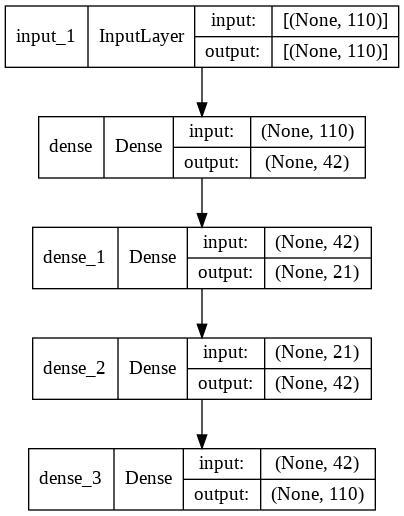

In [ ]:
plot_model(autoencoder, to_file='anomaly_detect_encoder1.png',show_shapes=True,show_layer_names=True)

2.2. Fit the model
Fit autoencoder to the "normal" instances of the train dataset.
Use ModelCheckpoint callback to save the best model to file:

checkpointer = ModelCheckpoint(filepath="autoencoder.h5",
                               verbose=0,
                               save_best_only=True)

Train the model for 100 epochs with a batch size of 32 samples and save the best performing model to a file using ModelCheckpoint provided by Keras.

Use the EarlyStopping callback that stops training when a monitored quantity has stopped improving.

In [ ]:
nb_epoch = 100
batch_size = 32

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error')

checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
earlystopping = EarlyStopping(monitor='val_loss', patience=1, verbose=0) # 'patience' number of not improving epochs
history = autoencoder.fit(X_trainNorm_val, X_trainNorm_val,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_testNorm_val, X_testNorm_val),
                    verbose=1,
                    callbacks=[checkpointer, #tensorboard, 
                               earlystopping]).history

Epoch 1/100
24320/24320 [==============================] - 62s 3ms/step - loss: 0.2694 - val_loss: 0.2470
Epoch 2/100
24320/24320 [==============================] - 61s 2ms/step - loss: 0.2163 - val_loss: 0.2276
Epoch 3/100
24320/24320 [==============================] - 69s 3ms/step - loss: 0.2005 - val_loss: 0.2173
Epoch 4/100
24320/24320 [==============================] - 66s 3ms/step - loss: 0.1913 - val_loss: 0.2105
Epoch 5/100
24320/24320 [==============================] - 61s 3ms/step - loss: 0.1850 - val_loss: 0.2043
Epoch 6/100
24320/24320 [==============================] - 62s 3ms/step - loss: 0.1808 - val_loss: 0.2024
Epoch 7/100
24320/24320 [==============================] - 63s 3ms/step - loss: 0.1783 - val_loss: 0.2046


3. Evaluation

3.1 Load the fitted autoencoder from file "autoencoder.h5".

In [ ]:
autoencoder = load_model('model.h5')

3.2. Reconstruction
Reconstruct the test dataset using the fitted autoencoder, calculate the mean squared error of the prediction.

3.3. Evaluate
Calculate MSE of each observation by averaging squared errors of reconstruction of all features in a row.

Calculate ROC and AUC. Select appropriate quantile and calculate Accuracy and Cohen's Kappa.

Tune parameters of autoencoder to achieve better results (see Section 2.1.). Try to make AUC = 0.97 or better to get a good score.

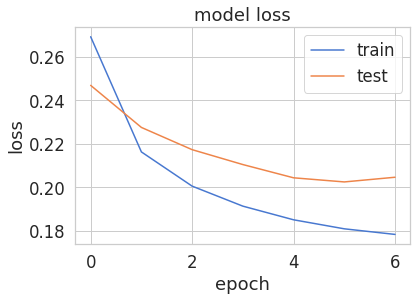

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [ ]:
testPredictions = autoencoder.predict(X_test)
X_test.shape,testPredictions.shape

((197053, 110), (197053, 110))

In [ ]:
testMSE = mean_squared_error(X_test.transpose(), testPredictions.transpose(),
                              multioutput='raw_values')
error_df = pd.DataFrame({'reconstruction_error': testMSE,'true_class': y_test})
error_df.head()

,reconstruction_error,true_class
940543,0.106878,1
356110,0.023814,0
540178,0.000385,0
672514,0.003576,0
244980,0.000783,0


In [ ]:
error_df.shape

(197053, 2)

In [ ]:
error_df.reconstruction_error.describe()

count    197053.000000
mean          0.284487
std          26.783304
min           0.000255
25%           0.000589
50%           0.001993
75%           0.008636
max        7259.996123
Name: reconstruction_error, dtype: float64

Reconstruction errors for normal transactions

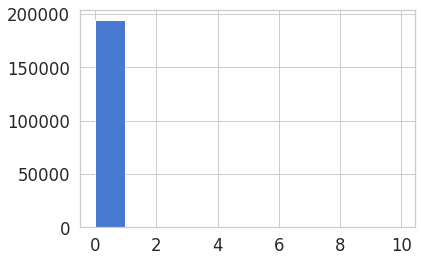

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
ax.hist(normal_error_df.reconstruction_error.values, bins=10);

Reconstruction errors for fraudulent transactions

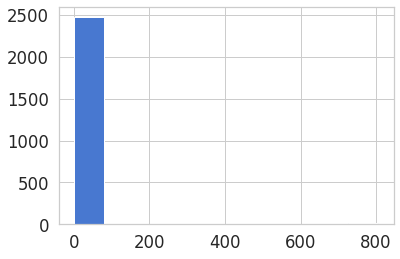

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
ax.hist(fraud_error_df.reconstruction_error.values, bins=10);

In [ ]:
from sklearn.metrics import (confusion_matrix, auc, roc_curve, cohen_kappa_score, accuracy_score)

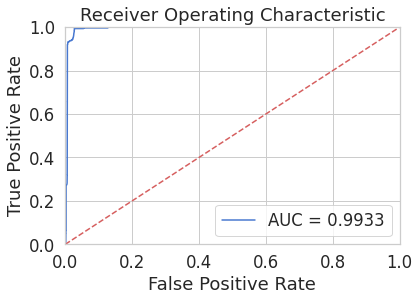

In [ ]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

Prediction

To detect fraud based on prediction MSE select a high level quantile of the MSE sample that guarantees probability of type 1 error. Select 0.995 quantile of the reconstruction error for "normal" class.

In [ ]:
threshold = normal_error_df.reconstruction_error.quantile(q=0.995)
threshold

0.5284756961049285

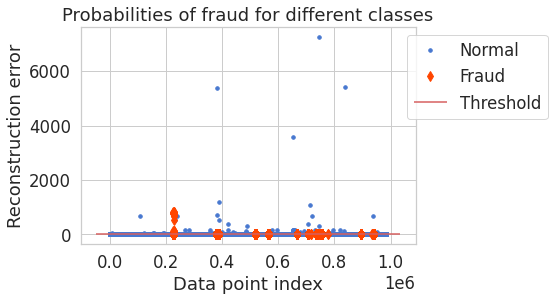

In [ ]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()
for name, group in groups:
    if name == 1:
        MarkerSize = 7
        Color = 'orangered'
        Label = 'Fraud'
        Marker = 'd'
    else:
        MarkerSize = 3.5
        Color = 'b'
        Label = 'Normal'
        Marker = 'o'
    ax.plot(group.index, group.reconstruction_error, 
            linestyle='',
            color=Color,
            label=Label,
            ms=MarkerSize,
            marker=Marker)
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend(loc='upper left', bbox_to_anchor=(0.95, 1))
plt.title("Probabilities of fraud for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

[[193450   1107]
 [  1701    795]]


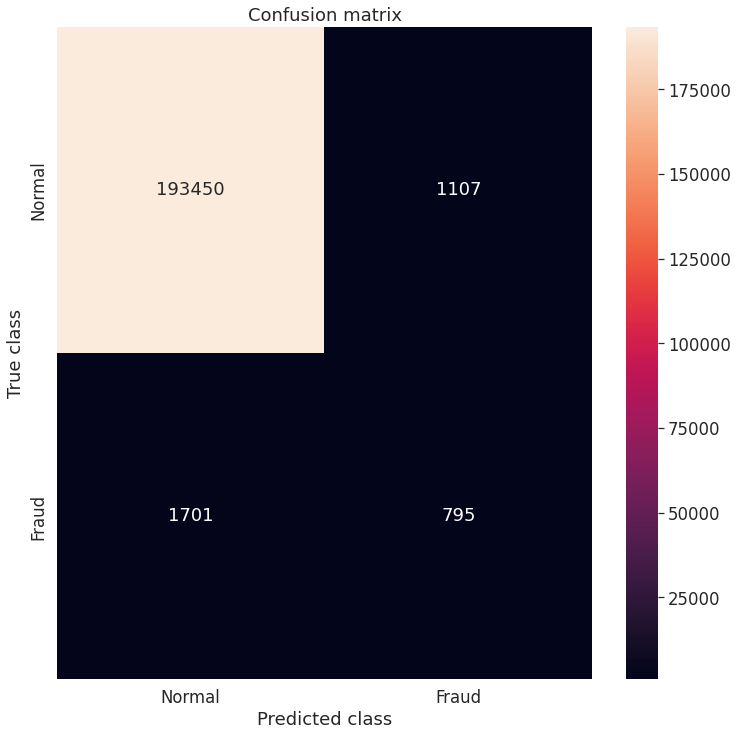

In [ ]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
print(conf_matrix)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=["Normal", "Fraud"], yticklabels=["Normal", "Fraud"], annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
cohen_kappa_score(error_df.true_class, y_pred),accuracy_score(error_df.true_class, y_pred)

(0.35445546619798474, 0.9857500266425784)

# test data prediction

In [ ]:
autoencoder = load_model('model.h5')

In [ ]:
testPredictions = autoencoder.predict(kddcuptest)
kddcuptest.shape,testPredictions.shape

((196557, 110), (196557, 110))

In [ ]:
testMSE = mean_squared_error(kddcuptest.transpose(), testPredictions.transpose(),
                              multioutput='raw_values')
testMSE

array([0.00046813, 0.00058465, 0.00447252, ..., 0.00060691, 0.00056475,
       0.00050208])

In [ ]:
result_df = pd.DataFrame({'reconstruction_error': testMSE})
result_df.to_csv('/content/drive/MyDrive/advanced ml/autoencoders/filename.csv')